<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Asocijativna%20analiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asocijativna analiza

Asocijativna analiza (_eng. Association Analysis/Association Rule Learning or Market Basket Analysis_)

Primena asocijativne analize u otkrivanju obrazaca ponasanja potrosaca u maloprodaji (_Groceries_). Sta to potrosaci kupuju zajedno, asocijativna analiza podataka o kupovini.

In [112]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth



---



## Podaci

Prikaz podataka:

In [127]:
try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Groceries/Groceries.csv -O Groceries.csv
except:
  print("An exception occurred")

data = pd.read_csv("Groceries.csv")

#data['Quantity'] = 1

data

--2025-07-06 09:55:31--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Groceries/Groceries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1064514 (1.0M) [text/plain]
Saving to: ‘Groceries.csv’

Groceries.csv       100%[===================>]   1.01M  --.-KB/s    in 0.06s   

2025-07-06 09:55:32 (18.1 MB/s) - ‘Groceries.csv’ saved [1064514/1064514]



,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


Razlicite (unikatne) vrednosti:

In [114]:
print(data['itemDescription'].nunique())

167


Provera i izbacivanje nedostajucih podataka:

In [115]:
#data = data.dropna(subset=["Item"])
print(data.isnull().any())

Member_number      False
Date               False
itemDescription    False
dtype: bool


Grupisanje podataka tako da svaki _Member_number_ ima svoje _itemDescription_ u 1 redu:

In [116]:
# Grupisanje transakcija/podataka po Member_number i itemDescription
grouped = data.groupby('Member_number')['itemDescription'].apply(list).reset_index()

grouped

,Member_number,itemDescription
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."
...,...,...
3893,4996,"[dessert, salty snack, rolls/buns, misc. bever..."
3894,4997,"[tropical fruit, white wine, whole milk, curd,..."
3895,4998,"[rolls/buns, curd]"
3896,4999,"[bottled water, butter milk, tropical fruit, b..."


In [117]:
print(grouped['itemDescription'].apply(tuple).nunique())

3881


Izdvajanje proizvoda u listu (_potrebno za kasnije kodiranje u binarne atribute_):

In [118]:
list_data = grouped['itemDescription'].tolist()

print(len(list_data))

list_data

3898


[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

Kodiranje proizvoda kao binarnih atributa

In [119]:
transactions = TransactionEncoder()

transactions_data = transactions.fit(list_data).transform(list_data)

df = pd.DataFrame(transactions_data, columns = transactions.columns_)

df = df.replace(0, False)
df = df.replace(1, True)

df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False




---



In [120]:
print(df.shape)

(3898, 167)


## FP growth

In [121]:
# FP growth
min_support_values = [0.02, 0.03]
min_confidence_values = [0.5, 0.6, 0.7, 0.8, 0.9]

best_avg_lift = 0
best_min_support = 0
best_min_confidence = 0

# Traženje najboljih vrednosti za min_support i min_confidence
for min_support in min_support_values:
     for min_confidence in min_confidence_values:
         frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold = min_confidence)
         avg_lift = rules["lift"].mean()
         print(f"Za min_support = {min_support} i min_confidence = {min_confidence} prosecni lift je {avg_lift}.")
         if avg_lift > best_avg_lift:
             best_avg_lift = avg_lift
             best_min_support = min_support
             best_min_confidence = min_confidence

print(f"Najbolji parametri su: min_support = {best_min_support}, i min_confidence = {best_min_confidence}.")

Za min_support = 0.02 i min_confidence = 0.5 prosecni lift je 1.250050057469719.
Za min_support = 0.02 i min_confidence = 0.6 prosecni lift je 1.3546270972074355.
Za min_support = 0.02 i min_confidence = 0.7 prosecni lift je nan.
Za min_support = 0.02 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.02 i min_confidence = 0.9 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.5 prosecni lift je 1.211641263175849.
Za min_support = 0.03 i min_confidence = 0.6 prosecni lift je 1.3313272731819934.
Za min_support = 0.03 i min_confidence = 0.7 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.9 prosecni lift je nan.
Najbolji parametri su: min_support = 0.02, i min_confidence = 0.6.


## Apriori algoritam

Trazenje najbolji vrednosti za min_support i min_confidence:

In [122]:
# Apriori algoritam
min_support_values = [0.02, 0.03]
min_confidence_values = [0.5, 0.6, 0.7, 0.8, 0.9]

best_avg_lift = 0
best_min_support = 0
best_min_confidence = 0

# Traženje najboljih vrednosti za min_support i min_confidence
for min_support in min_support_values:
     for min_confidence in min_confidence_values:
         frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
         rules = association_rules(frequent_itemsets, metric="confidence", min_threshold = min_confidence)
         avg_lift = rules["lift"].mean()
         print(f"Za min_support = {min_support} i min_confidence = {min_confidence} prosecni lift je {avg_lift}.")
         if avg_lift > best_avg_lift:
             best_avg_lift = avg_lift
             best_min_support = min_support
             best_min_confidence = min_confidence

print(f"Najbolji parametri su: min_support = {best_min_support}, i min_confidence = {best_min_confidence}.")

Za min_support = 0.02 i min_confidence = 0.5 prosecni lift je 1.250050057469719.
Za min_support = 0.02 i min_confidence = 0.6 prosecni lift je 1.3546270972074355.
Za min_support = 0.02 i min_confidence = 0.7 prosecni lift je nan.
Za min_support = 0.02 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.02 i min_confidence = 0.9 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.5 prosecni lift je 1.211641263175849.
Za min_support = 0.03 i min_confidence = 0.6 prosecni lift je 1.3313272731819936.
Za min_support = 0.03 i min_confidence = 0.7 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.9 prosecni lift je nan.
Najbolji parametri su: min_support = 0.02, i min_confidence = 0.6.


Izvrsavanje Apriori algoritma:

In [123]:
# Izvršavanje algoritma za zadate vrednosti parametara
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print(rules.head())

                antecedents   consequents  antecedent support  \
0  (other vegetables, beef)  (whole milk)            0.050795   
1        (beef, rolls/buns)  (whole milk)            0.040534   
2   (beef, root vegetables)  (whole milk)            0.033094   
3            (beef, yogurt)  (whole milk)            0.038481   
4    (pastry, bottled beer)  (whole milk)            0.033607   

   consequent support   support  confidence      lift  representativity  \
0            0.458184  0.030528    0.601010  1.311723               1.0   
1            0.458184  0.024371    0.601266  1.312281               1.0   
2            0.458184  0.020010    0.604651  1.319670               1.0   
3            0.458184  0.023602    0.613333  1.338619               1.0   
4            0.458184  0.020267    0.603053  1.316183               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.007255    1.357970       0.250361  0.063807   0.263607    0.333820  
1  0.00580

In [124]:
print(frequent_itemsets)

      support                                           itemsets
0    0.078502                                         (UHT-milk)
1    0.031042                                    (baking powder)
2    0.119548                                             (beef)
3    0.079785                                          (berries)
4    0.062083                                        (beverages)
..        ...                                                ...
889  0.027963       (other vegetables, soda, whole milk, yogurt)
890  0.021293  (other vegetables, tropical fruit, whole milk,...
891  0.021036            (soda, whole milk, sausage, rolls/buns)
892  0.022832          (whole milk, yogurt, sausage, rolls/buns)
893  0.024628             (soda, whole milk, yogurt, rolls/buns)

[894 rows x 2 columns]


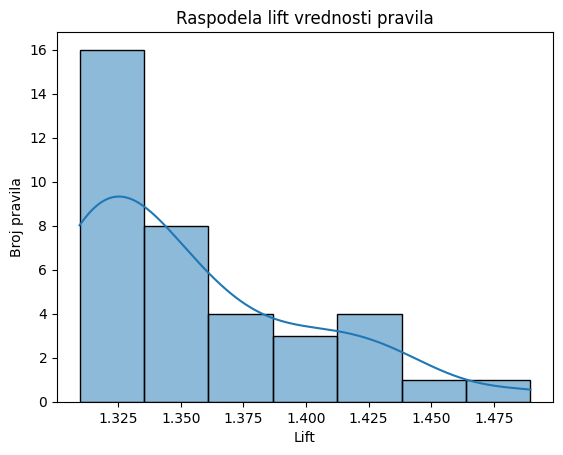

In [125]:
# Raspodela lift vrednosti pravila
sns.histplot(rules['lift'], kde=True)
plt.xlabel('Lift')
plt.ylabel('Broj pravila')
plt.title('Raspodela lift vrednosti pravila')
plt.show()

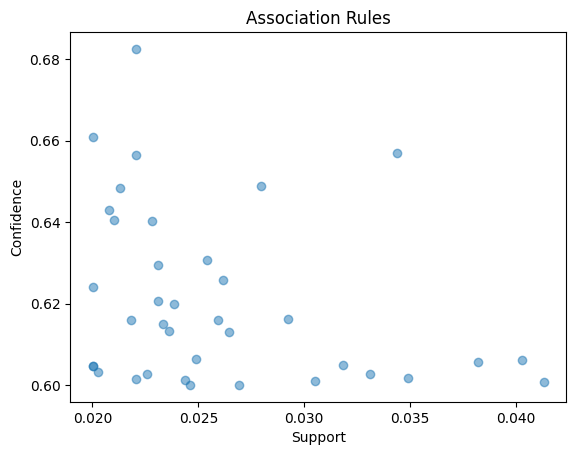

In [126]:
# Vizualizacija asocijativnih pravila
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()